In [1]:
# Imports
import fastf1
import matplotlib as mpl
import matplotlib.pyplot as plt
from fastf1 import plotting
from timple.timedelta import strftimedelta
from fastf1.core import Laps
import pandas as pd
import seaborn as sns

In [2]:
# GP picker
year = 2022 #GP year
gp = 'Bahrain' # GP name
event = 1 # Q for qualifying, FP1 for free practice 1, R for race

In [73]:
# Configure matplotlib and f1 plots with this intit
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (6,6)
fastf1.Cache.enable_cache(r"/Users/Professor/Downloads/f1/cache")
fastf1.plotting.setup_mpl()
fastf1.plotting.setup_mpl(mpl_timedelta_support = True, color_scheme = 'fastf1', misc_mpl_mods = False)

In [74]:
session = fastf1.get_session(year, gp, event)
laps = session.load_laps(with_telemetry=True)
laps.dropna(subset=['Driver'], inplace = True)

InvalidSessionError: No matching session can be found.

In [58]:
driver = 'VER'
tel_ver = laps[laps['Driver']==driver].pick_fastest().get_telemetry()
driver = 'HAM'
tel_ham = laps[laps['Driver']==driver].pick_fastest().get_telemetry()

Text(0.5, 1.0, 'Abu Dhabi Grand Prix 2021 \nQualifying, Gear shift')

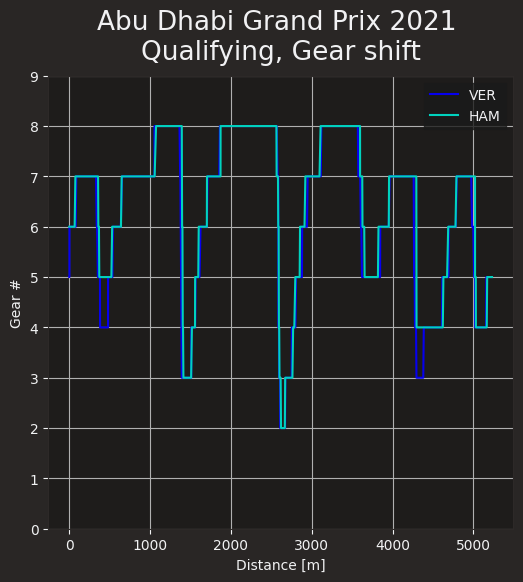

In [59]:
plt.plot(tel_ver['Distance'], tel_ver['nGear'], label='VER', color=fastf1.plotting.team_color('Red Bull'))
plt.plot(tel_ham['Distance'], tel_ham['nGear'], label='HAM', color=fastf1.plotting.team_color('Mercedes'))
plt.xlabel('Distance [m]')
plt.ylabel('Gear #')
plt.ylim(0, 9)
plt.grid()
plt.legend()
plt.title(f"{session.weekend.name} {session.weekend.year} \nQualifying, Gear shift")

Text(0.5, 1.0, 'Abu Dhabi Grand Prix 2021 \nQualifying, RPM')

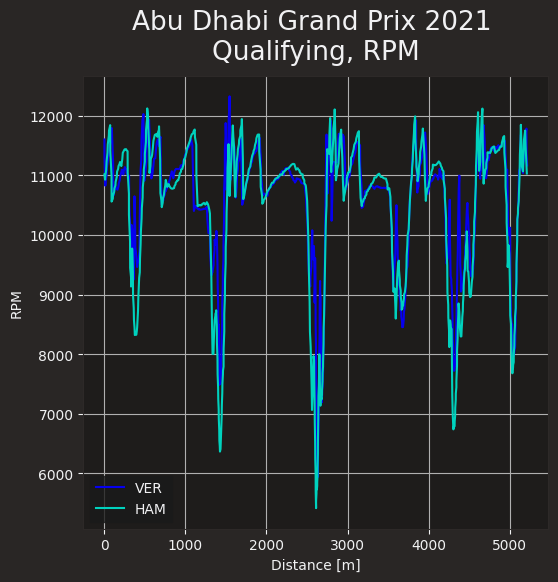

In [53]:
plt.plot(tel_ver['Distance'], tel_ver['RPM'], label='VER', color=fastf1.plotting.team_color('Red Bull'))
plt.plot(tel_ham['Distance'], tel_ham['RPM'], label='HAM', color=fastf1.plotting.team_color('Mercedes'))
plt.xlabel('Distance [m]')
plt.ylabel('RPM')
#plt.ylim(0, 9)
plt.grid()
plt.legend()
plt.title(f"{session.weekend.name} {session.weekend.year} \nQualifying, RPM")

In [60]:
ham_qual = tel_ham

Text(0.5, 1.0, 'Abu Dhabi Grand Prix 2021 \nLewis Q vs R, RPM')

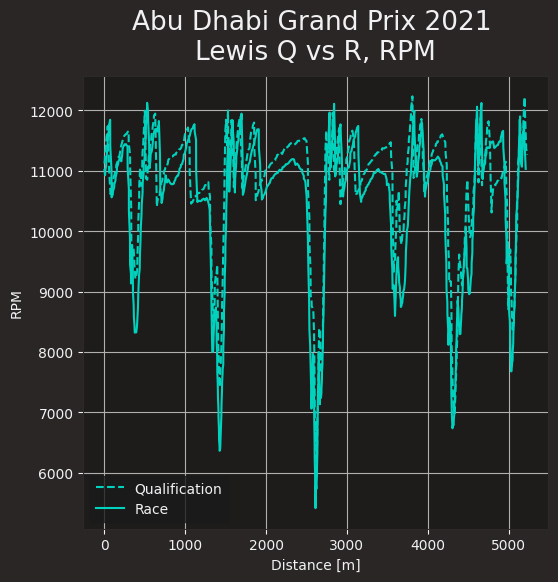

In [65]:
plt.plot(ham_qual['Distance'], ham_qual['RPM'], label='Qualification', color=fastf1.plotting.team_color('Mercedes'), linestyle='--')
plt.plot(ham_race['Distance'], ham_race['RPM'], label='Race', color=fastf1.plotting.team_color('Mercedes'))
plt.xlabel('Distance [m]')
plt.ylabel('RPM')
#plt.ylim(0, 9)
plt.grid()
plt.legend()
plt.title(f"{session.weekend.name} {session.weekend.year} \nLewis Q vs R, RPM")